# Datos de accidentes de tráfico en Madrid (2017-2018)

**Fuente**: [datos.madrid.es](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

### Autores:
- Nelson Saturno
- Pablo Nieto

## Descripción

Datos en los ficheros:

- FECHA: formato dd/mm/aaaa
- RANGO HORARIO: rango horario en el que ocurrió el accidente.
- DIA SEMANA
- DISTRITO
- LUGAR ACCIDENTE
- Nº: número de la calle (sólo si tiene sentido).
- Nº PARTE: identificador del accidente. Si distintos registros tienen el mismo número parte, se trata del mismo accidente donde hay varios afectados.
- CPFA Granizo: condiciones ambientales que se dan en el momento del siniestro, granizo.
- CPFA Hielo: condiciones ambientales que se dan en el momento del siniestro, hielo.
- CPFA Lluvia: condiciones ambientales que se dan en el momento del siniestro, lluvia.
- CPFA Niebla: condiciones ambientales que se dan en el momento del siniestro, niebla.
- CPFA Seco: condiciones ambientales que se dan en el momento del siniestro, seco.
- CPFA Nieve: condiciones ambientales que se dan en el momento del siniestro, nieve.
- CPSV Mojada: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, mojada.
- CPSV Aceite: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, aceite.
- CPSV Barro: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, barro.
- CPSV Grava Suelta: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, grava suelta.
- CPSV Hielo: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, hielo.
- CPSV Seca Y Limpia: circunstancias que afectan el estado de la vía en el momento de producirse el siniestro, seca y limpia.
- Nº VICTIMAS
- TIPO ACCIDENTE: colisión doble, colisión múltiple, choque con objeto fijo, atropello, vuelco, caída motocicleta, caída ciclomotor, caída bicicleta, caída viajero bus.
- Tipo Vehiculo
- TIPO PERSONA: Conductor, peatón, testigo o viajero.
- SEXO: hombre, mujer o no asignado
- LESIVIDAD: muerto, herido grave, herido leve, ileso
- Tramo Edad

---
### Carga de datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Se cargan los datos y se renombran todas las columnas
new_names = [
    'fecha', 'rango_horario', 'dia_semana', 'distrito',
    'lugar_accidente', 'num_calle', 'num_parte', 'fa_granizo',
    'fa_hielo', 'fa_lluvia', 'fa_niebla', 'fa_seco', 'fa_nieve',
    'sv_mojado', 'sv_aceite', 'sv_barro', 'sv_grava_suelta',
    'sv_hielo', 'sv_seca_limpia', 'num_victimas', 'tipo_accidente',
    'tipo_vehiculo', 'tipo_persona', 'sexo', 'lesividad', 'tramo_edad'
]

# Datos para 2017
df_accidents_2017 = pd.read_excel(
    'https://datos.madrid.es/egob/catalogo/300228-1-accidentes-trafico-detalle.xlsx',
    skiprows=0, names=new_names
)

# Datos para 2018
df_accidents_2018 = pd.read_excel(
    'https://datos.madrid.es/egob/catalogo/300228-0-accidentes-trafico-detalle.xlsx',
    skiprows=0, names=new_names
)

# Unión de datos 2017-2018
df_all_accidents = pd.concat([df_accidents_2017, df_accidents_2018], sort=False)

#Limpiezas
df_all_accidents['tramo_edad'] = df_all_accidents['tramo_edad'].str.replace('DE 6 A 9 AÑOS','DE 06 A 9 AÑOS')
df_all_accidents['tipo_accidente'] = df_all_accidents['tipo_accidente'].str.strip()
df_all_accidents['tipo_vehiculo'] = df_all_accidents['tipo_vehiculo'].str.strip()
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 1:',' 01:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 2:',' 02:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 3:',' 03:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 4:',' 04:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 5:',' 05:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 6:',' 06:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 7:',' 07:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 8:',' 08:')
df_all_accidents['rango_horario'] = df_all_accidents['rango_horario'].str.replace(' 9:',' 09:')

df_all_accidents.head(10)

,fecha,rango_horario,dia_semana,distrito,lugar_accidente,num_calle,num_parte,fa_granizo,fa_hielo,fa_lluvia,...,sv_grava_suelta,sv_hielo,sv_seca_limpia,num_victimas,tipo_accidente,tipo_vehiculo,tipo_persona,sexo,lesividad,tramo_edad
0,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
1,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,MUJER,HL,DE 30 A 34 ANOS
2,2017-01-01,DE 02:00 A 02:59,DOMINGO,VILLAVERDE,CALLE DE SANTA JOAQUINA DE VEDRUNA NUM ...,3,2017/1,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,HG,DE 21 A 24 AÑOS
3,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,MUJER,HL,DE 45 A 49 AÑOS
4,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,VIAJERO,MUJER,IL,DE 10 A 14 AÑOS
5,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 21 A 24 AÑOS
6,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
7,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS
8,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
9,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,AUTO-TAXI,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS


---
### Víctimas por accidente

In [10]:
s_num_victims_by_accident = df_all_accidents.groupby(['num_parte'])['num_victimas'].sum()
s_num_victims_by_accident.head(10)


num_parte
2017/1         1
2017/1000      2
2017/10000     4
2017/10001    15
2017/10002     2
2017/10003     4
2017/10004     3
2017/10005     2
2017/10006     1
2017/10009     4
Name: num_victimas, dtype: int64

---
### Accidentes sin factores climáticos desfavorables

In [11]:
df_best_weather = df_all_accidents[
    (df_all_accidents['sv_seca_limpia'] == 'SI') & (df_all_accidents['fa_seco'] == 'SI')
]
df_best_weather.head(10)

,fecha,rango_horario,dia_semana,distrito,lugar_accidente,num_calle,num_parte,fa_granizo,fa_hielo,fa_lluvia,...,sv_grava_suelta,sv_hielo,sv_seca_limpia,num_victimas,tipo_accidente,tipo_vehiculo,tipo_persona,sexo,lesividad,tramo_edad
0,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
1,2017-01-01,DE 01:00 A 01:59,DOMINGO,VILLA DE VALLECAS,AVENIDA DEL MAYORAZGO NUM ...,26,2017/76,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,FURGONETA,CONDUCTOR,MUJER,HL,DE 30 A 34 ANOS
2,2017-01-01,DE 02:00 A 02:59,DOMINGO,VILLAVERDE,CALLE DE SANTA JOAQUINA DE VEDRUNA NUM ...,3,2017/1,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,HG,DE 21 A 24 AÑOS
3,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,MUJER,HL,DE 45 A 49 AÑOS
4,2017-01-01,DE 05:00 A 05:59,DOMINGO,ARGANZUELA,CALLE 30 15RA KM. ...,30,2017/30,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,VIAJERO,MUJER,IL,DE 10 A 14 AÑOS
5,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 21 A 24 AÑOS
6,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
7,2017-01-01,DE 06:00 A 06:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,NO,SI,1,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS
8,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,NO ASIGNADO,NO ASIGNADA,DESCONOCIDA
9,2017-01-01,DE 07:00 A 07:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE LA ALBUFERA - AVENIDA DE LA DEMOCRA...,0,2017/245,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,AUTO-TAXI,CONDUCTOR,HOMBRE,HL,DE 50 A 54 AÑOS


---
###  Accidentes ocurridos en días de semana

In [13]:
weekdays = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES']

df_accidents_on_weekdays = df_all_accidents[df_all_accidents['dia_semana'].isin(weekdays)]
df_accidents_on_weekdays.head(10)

,fecha,rango_horario,dia_semana,distrito,lugar_accidente,num_calle,num_parte,fa_granizo,fa_hielo,fa_lluvia,...,sv_grava_suelta,sv_hielo,sv_seca_limpia,num_victimas,tipo_accidente,tipo_vehiculo,tipo_persona,sexo,lesividad,tramo_edad
58,2017-01-02,DE 00:00 A 00:59,LUNES,CENTRO,CALLE GRAN VIA NUM ...,13,2017/67,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,PEATON,MUJER,HL,DE 25 A 29 AÑOS
59,2017-01-02,DE 00:00 A 00:59,LUNES,CENTRO,CALLE GRAN VIA NUM ...,13,2017/67,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DE 30 A 34 ANOS
60,2017-01-02,DE 00:00 A 00:59,LUNES,CENTRO,CALLE GRAN VIA NUM ...,13,2017/67,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 40 A 44 AÑOS
61,2017-01-02,DE 07:00 A 07:59,LUNES,LATINA,PASEO DE EXTREMADURA - PLAZA DE LA PUERTA DEL ...,0,2017/27,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HL,DE 45 A 49 AÑOS
62,2017-01-02,DE 07:00 A 07:59,LUNES,LATINA,PASEO DE EXTREMADURA - PLAZA DE LA PUERTA DEL ...,0,2017/27,NO,NO,NO,...,NO,NO,SI,1,ATROPELLO,TURISMO,CONDUCTOR,HOMBRE,IL,DE 30 A 34 ANOS
63,2017-01-02,DE 08:00 A 08:59,LUNES,CENTRO,CALLE DE VILLANUEVA - PASEO DE RECOLETOS ...,0,2017/293,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS
64,2017-01-02,DE 08:00 A 08:59,LUNES,CENTRO,CALLE DE VILLANUEVA - PASEO DE RECOLETOS ...,0,2017/293,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,IL,DE 50 A 54 AÑOS
65,2017-01-02,DE 08:00 A 08:59,LUNES,CENTRO,CALLE DE VILLANUEVA - PASEO DE RECOLETOS ...,0,2017/293,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,MOTOCICLETA,CONDUCTOR,MUJER,HL,DE 45 A 49 AÑOS
66,2017-01-02,DE 08:00 A 08:59,LUNES,MONCLOA-ARAVACA,AVENIDA DEL PADRE HUIDOBRO NUM ...,5,2017/122,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS
67,2017-01-02,DE 08:00 A 08:59,LUNES,MONCLOA-ARAVACA,AVENIDA DEL PADRE HUIDOBRO NUM ...,5,2017/122,NO,NO,NO,...,NO,NO,SI,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,MUJER,HL,DE 35 A 39 AÑOS


---
### Accidentes por distrito y por año

In [16]:
df_accidents_by_district = pd.pivot_table(
    df_all_accidents, index=['distrito'], columns=[df_all_accidents['fecha'].dt.year],
    aggfunc=pd.Series.nunique, values='num_parte'
)

print(df_accidents_by_district)

# Se verifica que el resultado es correcto
if not df_accidents_by_district[2017].sum() == df_accidents_2017['num_parte'].nunique():
    raise Exception("Error para el año 2017")
if not df_accidents_by_district[2018].sum() == df_accidents_2018['num_parte'].nunique():
    raise Exception("Error para el año 2018")

fecha                           2017  2018
distrito                                  
ARGANZUELA                       529   449
BARAJAS                          182   150
CARABANCHEL                      640   494
CENTRO                           740   640
CHAMARTIN                        736   658
CHAMBERI                         629   500
CIUDAD LINEAL                    672   542
FUENCARRAL-EL PARDO              556   466
HORTALEZA                        413   323
LATINA                           512   389
MONCLOA-ARAVACA                  524   515
MORATALAZ                        267   216
PUENTE DE VALLECAS               623   502
RETIRO                           583   478
SALAMANCA                        758   737
SAN BLAS                         494   466
TETUAN                           565   517
USERA                            326   293
VICALVARO                        138   129
VILLA DE VALLECAS                246   216
VILLAVERDE                       276   231


---
### Número de personas afectadas por año y por lesividad

In [30]:
# Renombramiento de valores de la columna 'lesividad' en una nueva columna
def readable_injury(key):
    injury = {
        'IL': 'ILESO',
        'HL': 'HERIDO LEVE',
        'HG': 'HERIDO GRAVE',
        'MT': 'MUERTO'
    }
    return injury.setdefault(key.replace(' ', ''), 'NO ASIGNADA')


df_all_accidents['tipo_lesividad'] = df_all_accidents['lesividad'].apply(readable_injury)

# Número de personas por tipo de lesividad calculado por año
df_injuries_by_year = pd.pivot_table(
    df_all_accidents, index=['tipo_lesividad'], columns=[df_all_accidents['fecha'].dt.year],
    aggfunc='sum', values='num_victimas'
)

if not df_accidents_2017['num_victimas'].sum() == df_injuries_by_year[2017].sum():
    raise Exception("Error para el año 2017")
if not df_accidents_2018['num_victimas'].sum() == df_injuries_by_year[2018].sum():
    raise Exception("Error para el año 2018")

print(df_injuries_by_year)

fecha            2017   2018
tipo_lesividad              
HERIDO GRAVE     1397   1011
HERIDO LEVE     20174  18046
ILESO           19667  16461
MUERTO             35     46
NO ASIGNADA      1361   1208


### Accidentes por sexo

In [44]:
import matplotlib.pyplot as plt

In [45]:
df_sexo = df_all_accidents.groupby(['sexo'])['fecha'].\
    count().reset_index().rename(columns={'fecha' : 'Total'})
df_sexo

,sexo,Total
0,HOMBRE,34542
1,MUJER,17791
2,NO ASIGNADO,2602


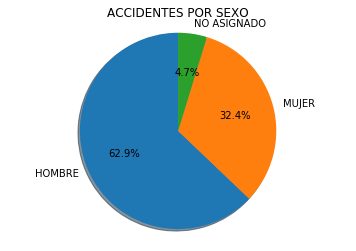

In [46]:
fig, ax = plt.subplots()
ax.pie(
    df_sexo.Total, labels=df_sexo.sexo,
    autopct='%1.1f%%', shadow=True, startangle=90
)
ax.set_title('ACCIDENTES POR SEXO')
ax.axis('equal')  # Asegura que la gráfica se muestre como un círculo.

plt.show()

### Víctimas por tipo de accidente y edad

In [47]:
df_edad_victim_tipo = df_all_accidents.groupby(['tipo_accidente','tramo_edad'])['fecha'].\
    count().reset_index().rename(columns={'fecha': 'Total'})

In [48]:
df_edad_victim_tipo.head(10)

,tipo_accidente,tramo_edad,Total
0,ATROPELLO,DE 0 A 5 AÑOS,141
1,ATROPELLO,DE 06 A 9 AÑOS,124
2,ATROPELLO,DE 10 A 14 AÑOS,148
3,ATROPELLO,DE 15 A 17 AÑOS,137
4,ATROPELLO,DE 18 A 20 AÑOS,300
5,ATROPELLO,DE 21 A 24 AÑOS,423
6,ATROPELLO,DE 25 A 29 AÑOS,672
7,ATROPELLO,DE 30 A 34 ANOS,686
8,ATROPELLO,DE 35 A 39 AÑOS,728
9,ATROPELLO,DE 40 A 44 AÑOS,813


In [49]:
df_edad_victim_tipo[df_edad_victim_tipo.tipo_accidente=='ATROPELLO'].sort_values(by='Total',ascending=False)

,tipo_accidente,tramo_edad,Total
9,ATROPELLO,DE 40 A 44 AÑOS,813
8,ATROPELLO,DE 35 A 39 AÑOS,728
10,ATROPELLO,DE 45 A 49 AÑOS,722
7,ATROPELLO,DE 30 A 34 ANOS,686
11,ATROPELLO,DE 50 A 54 AÑOS,676
6,ATROPELLO,DE 25 A 29 AÑOS,672
17,ATROPELLO,DESCONOCIDA,664
16,ATROPELLO,DE MAS DE 74 AÑOS,601
12,ATROPELLO,DE 55 A 59 AÑOS,514
5,ATROPELLO,DE 21 A 24 AÑOS,423


### Incidentes por tipo de vehículo

In [50]:
df_tipo_vehiculo = df_all_accidents.groupby(['tipo_vehiculo'])['fecha'].\
    count().reset_index().rename(columns={'fecha': 'Total'}).sort_values(by='Total',ascending=False)
df_tipo_vehiculo

,tipo_vehiculo,Total
9,TURISMO,27911
8,NO ASIGNADO,9891
7,MOTOCICLETA,8148
6,FURGONETA,2171
2,AUTOBUS-AUTOCAR,1705
1,AUTO-TAXI,1515
3,BICICLETA,1361
5,CICLOMOTOR,1212
4,CAMION,503
10,VARIOS,381


### Acciedentes en bici agrupados por tipo y lesividad

In [51]:
df_all_accidents['tipo_vehiculo'] = df_all_accidents['tipo_vehiculo'].str.strip()
df_bici = df_all_accidents[df_all_accidents.tipo_vehiculo=='BICICLETA']

In [52]:
df_bici_lesion = df_bici.groupby(['tipo_lesividad','tipo_accidente'])['fecha'].count().reset_index().rename(columns={'fecha': 'Total'}).sort_values(by='Total',ascending=False)
df_bici_lesion

,tipo_lesividad,tipo_accidente,Total
7,HERIDO LEVE,COLISIÓN DOBLE,560
5,HERIDO LEVE,CAÍDA BICICLETA,497
9,ILESO,ATROPELLO,78
3,HERIDO GRAVE,COLISIÓN DOBLE,59
1,HERIDO GRAVE,CAÍDA BICICLETA,46
4,HERIDO LEVE,ATROPELLO,32
6,HERIDO LEVE,CHOQUE CON OBJETO FIJO,25
13,ILESO,COLISIÓN DOBLE,20
16,NO ASIGNADA,ATROPELLO,10
11,ILESO,CAÍDA MOTOCICLETA,8


### Horarios de accidentes

In [53]:
df_horarios = df_accidents_on_weekdays.groupby(['dia_semana','rango_horario'])['fecha'].\
    count().reset_index().rename(columns={'fecha': 'Total'})

In [54]:
lunes = df_horarios[df_horarios.dia_semana=='LUNES']['Total'].\
    rename(columns={'Total' : 'lunes'}).reset_index()[0]
martes = df_horarios[df_horarios.dia_semana=='MARTES']['Total'].\
    rename(columns={'Total' : 'martes'}).reset_index()[0]
miercoles = df_horarios[df_horarios.dia_semana=='MIERCOLES']['Total'].\
    rename(columns={'Total' : 'miercoles'}).reset_index()[0]
jueves = df_horarios[df_horarios.dia_semana=='JUEVES']['Total'].\
    rename(columns={'Total' : 'jueves'}).reset_index()[0]
viernes = df_horarios[df_horarios.dia_semana=='VIERNES']['Total'].\
    rename(columns={'Total' : 'viernes'}).reset_index()[0]

#horarios=np.sort(df_horarios['rango_horario'].unique())
horarios = range(0,24)
df_plot = pd.DataFrame(
    {
        'horarios': horarios,
        'lunes': lunes,
        'martes':martes,
        'miercoles':miercoles,
        'jueves':jueves,
        'viernes':viernes
    }
)

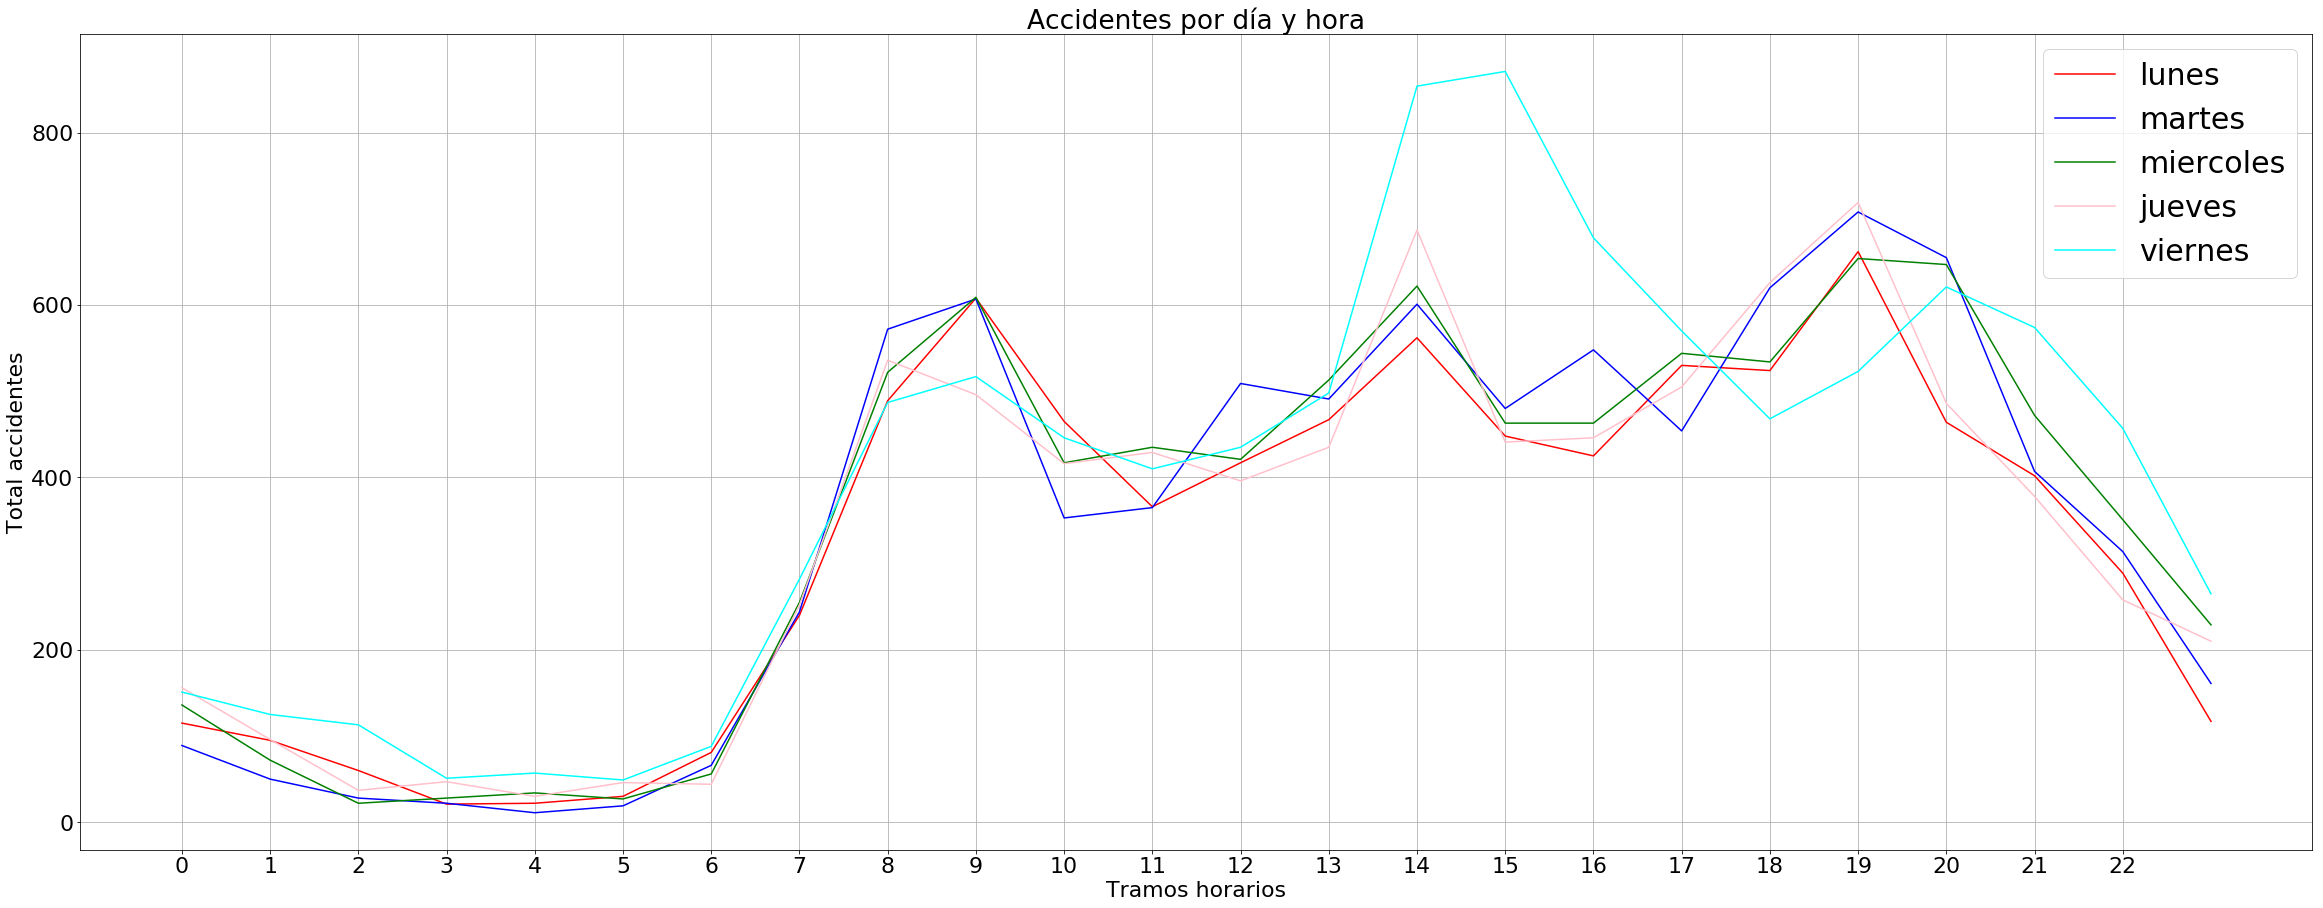

In [57]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(40,15))
ax.plot(horarios,lunes,color='red',label='lunes')
ax.plot(horarios,martes,color='blue',label='martes')
ax.plot(horarios,miercoles,color='green',label='miercoles')
ax.plot(horarios,jueves,color='pink',label='jueves')
ax.plot(horarios,viernes,color='cyan',label='viernes')

ax.set_title('Accidentes por día y hora')
ax.set_xlabel('Tramos horarios')
ax.set_ylabel('Total accidentes')
ax.grid(True)

major_ticks = np.arange(0, 23, 1)
ax.set_xticks(major_ticks)

plt.legend(prop={'size': 30})
plt.show()